In [1]:
from scipy.stats import spearmanr
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn.datasets as datasets


In [2]:
math    = [6, 4, 5, 10, 2, 8, 3, 9, 1, 7]
english = [10, 1, 4, 9, 3, 8, 6, 5, 2, 7]

x = [6, 4, 5, 10, 2, 8, 3, 9, 1, 7]
y = [10, 1, 4, 9, 3, 8, 6, 5, 2, 7]
z = [16, 14, 15, 20, 12, 18, 13, 19, 11, 1]
df = pd.DataFrame({'x': x,'y': y, 'z': z})

# ピアソンの積立相関係数

In [3]:
df_p = df.corr()
df_p

,x,y,z
x,1.000000,0.672727,0.39572
y,0.672727,1.000000,0.21308
z,0.395720,0.213080,1.00000


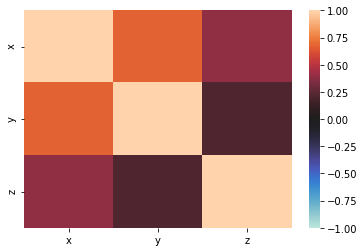

In [4]:
sns.heatmap(df_p, vmax=1, vmin=-1, center=0)

# スピアマンの順位相関係数

In [5]:
correlation, pvalue = spearmanr(math, english)
correlation

0.6727272727272726

In [6]:
df_s = df.corr(method="spearman")
df_s

,x,y,z
x,1.000000,0.672727,0.745455
y,0.672727,1.000000,0.478788
z,0.745455,0.478788,1.000000


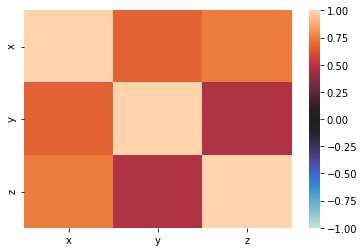

In [7]:
sns.heatmap(df_s, vmax=1, vmin=-1, center=0)

# 相関比

In [8]:
def CorrelationV(x, y):
    """
    Calc Correlation ratio 

    Parameters
    ----------
    x : nominal scale {numpy.ndarray, pandas.Series}
    y : ratio   scale {numpy.ndarray, pandas.Series}
    """
    # 級内変動
    variation = ((y - y.mean()) ** 2).sum()
    # 級関変動
    inter_class = sum([((y[x == i] - y[x == i].mean()) ** 2).sum() for i in np.unique(x)])
    correlation_ratio = inter_class / variation
    return 1 - correlation_ratio

print('----------001')
x = np.array([1,2,3,4,5,6,7,8,9,9])
y = np.array([0,0,0,1,1,1,2,2,2,2])
result = CorrelationV(x, y)
print(result)

print('----------002')
iris = datasets.load_iris()
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_y = pd.DataFrame(iris.target, columns=['y'])
result = CorrelationV(df_X['sepal length (cm)'], df_y['y'])
print(result)

----------001
1.0
----------002
0.7200873015873016


# ピアソンとスピアマンと相関比で比較してみた

In [9]:
df = pd.concat([df_X, df_y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# 0.782561
df_p = df.corr()
df_p

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
y,0.782561,-0.426658,0.949035,0.956547,1.000000


In [11]:
# 0.798078
df_s = df.corr(method="spearman")
df_s

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
sepal length (cm),1.000000,-0.166778,0.881898,0.834289,0.798078
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal length (cm),0.881898,-0.309635,1.000000,0.937667,0.935431
petal width (cm),0.834289,-0.289032,0.937667,1.000000,0.938179
y,0.798078,-0.440290,0.935431,0.938179,1.000000


In [12]:
# 0.7200873015873016
result = CorrelationV(df_X['sepal length (cm)'], df_y['y'])
result

0.7200873015873016